<a href="https://colab.research.google.com/github/myan105/machine-learning-wine-dataset/blob/main/WineDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Analyze the Wine dataset, which contains the results of a chemical analysis of wines grown in a specific region in Italy, derived from three different cultivars (classes). The dataset consists of various chemical properties present in the wines, making it suitable for classification and clustering tasks.

The goals are to perform exploratory data analysis (EDA),handle missing data, standardize the data, and apply dimensionality reduction techniques to understand the underlying structure of the dataset.

# The Wine Dataset:`
The dataset consists of the following features:

* Alcohol: The alcohol content of the wine.
* Malic Acid: The malic acid content of the wine.
* Ash: The ash content of the wine.
* Alcalinity of Ash: The amount of ash that results after burning.
* Magnesium: The magnesium content of the wine.
* Total Phenols: The total phenolic content of the wine.
* Flavanoids: The flavonoid content of the wine.
* Nonflavanoid Phenols: The non-flavonoid phenolic content of the wine.
* Proanthocyanins: The proanthocyanin content of the wine.
* Color Intensity: The intensity of color in the wine.
* Hue: The hue of the wine.
* OD280/OD315 of Diluted Wines: The ratio of optical density measurements at 280nm and 315nm of the wine.
* Proline: The proline content of the wine.

Each row in the dataset represents a wine sample, and the target variable is the cultivar (class) of the wine. There are three classes in total, representing three different types of wines.



# Data Loading and Preprocessing:
* Load the Wine dataset into a DataFrame.
* Standardize the data: Standardize the features by subtracting the mean and dividing by the standard deviation.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from numpy.linalg import svd

In [ ]:
# Load the Wine dataset
wine_data = load_wine()
X = wine_data.data
y = wine_data.target
feature_names = wine_data.feature_names

**Coding excersice:** Convert the dataset to a DataFrame and display the first few rows of the dataset.

In [ ]:
# Convert the dataset to a DataFrame
df = pd.DataFrame(X, columns=feature_names)

# Display the first few rows of the dataset
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:

pip install fancyimpute


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 14.3 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29879 sha256=5392595acf66772e8b0f4ec4d9ff792d47c26abd4e065f9a0c40fcf8bc9cbdf3
  Stored in directory: /root/.cache/pip/wheels/1a/f3/a1/f7f10b5ae2c2459398762a3fcf4ac18c325311c7e3163d5a15
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=a8e1d828fa1dfb5669ddb0b56b53cbbd51184c9d1757f63c1af8894fdc3e839e
  Stored in directory: /root/.cache/pip/wheels/ea/e8/e0/79872972161e54486517ae507f94b2c7cea27fb7ef793bd415
Successfully built fancyimpute knnimpute


# Data Quality Issues:
We artificially impose the following data quality issues to the original dataset. Then use the mean, median and iterative methods to recover the missing values and calculate the mean square error!

**Note:** You need to import IterativeImputer module from fancyimpute library. You might need to run "pip install fancyimpute"

**Note:**
'*SimpleImputer*' is a class provided by scikit-learn for handling missing values in datasets. It provides a simple strategy to impute missing values using the mean, median, most frequent, or constant value of the respective columns.

In [ ]:

from sklearn.datasets import load_wine
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from math import sqrt
from fancyimpute import IterativeImputer

# Load the Wine dataset
wine_data = load_wine()
X = wine_data.data
feature_names = wine_data.feature_names

# Convert to DataFrame
df = pd.DataFrame(X, columns=feature_names)

# Make a copy of the original dataset for comparison
df_original = df.copy()

# Introduce missing values for demonstration
df.iloc[10:15, 0] = np.nan
df.iloc[20:25, 1] = np.nan
df.iloc[30:35, 2] = np.nan

# Handling missing values using different methods and calculating RMSE
imputation_methods = ['mean', 'median', 'iterative']
rmse_results = {}

for method in imputation_methods:
    if method == 'iterative':
        imputer = IterativeImputer(max_iter=10, random_state=42)
    else:
        imputer = SimpleImputer(strategy=method)

    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=feature_names)


    # Compute RMSE only for the previously missing values
    mask = df.isna().values  # Boolean mask for missing values

    original_values = df_original.values[mask]
    imputed_values = df_imputed.values[mask]

    # Ensure valid comparisons
    if original_values.size > 0 and imputed_values.size > 0:
        rmse = sqrt(mean_squared_error(original_values, imputed_values))
        rmse_results[method] = rmse

# Print RMSE results
if rmse_results:
    for method, rmse in rmse_results.items():
        print(f"RMSE for {method} imputation: {rmse:.4f}")
else:
    print("No missing values were imputed, so RMSE could not be calculated.")


RMSE for mean imputation: 0.9105
RMSE for median imputation: 0.8872
RMSE for iterative imputation: 0.5556


**Question:** Which method works best? Why do you think is that?

**You Answer:** The iterative imputation method works best because it has the lowerst RMSE (0.5556).


This is because it estimates missing values based on relationships with other features and iterates multiple times to refine the imputed values. Therefore, this method provide the most accurate results.

---

# Data Visualization:
**Coding excersice:** Use a box plot to visualize the features of the original data (i.e., dataframe without considering data quality issues)

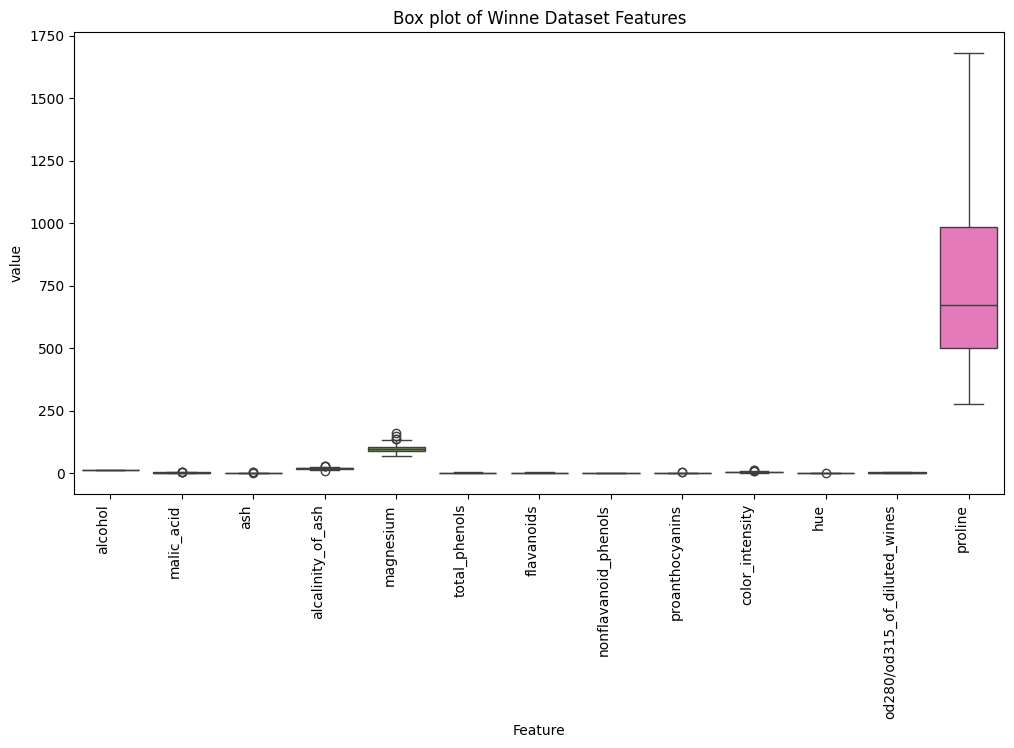

In [ ]:
# Exploratory Data Analysis
# Visualize key statistics
plt.figure(figsize=(12,6))
sns.boxplot(data=df_imputed)
plt.title("Box plot of Winne Dataset Features")
plt.xlabel("Feature")
plt.ylabel("value")
plt.xticks(rotation=90, ha="right")
plt.show()

**Question:** What do you see? What is the problem?

**You Answer:** I see that some features have significant larger numberical values than others so they make it difficult to compare different features.


---



# Data Standardization:
**Coding excersice:** Standardize the original data (i.e., dataframe without considering data quality issues) and use the same boxplot to visualize the standardized data!

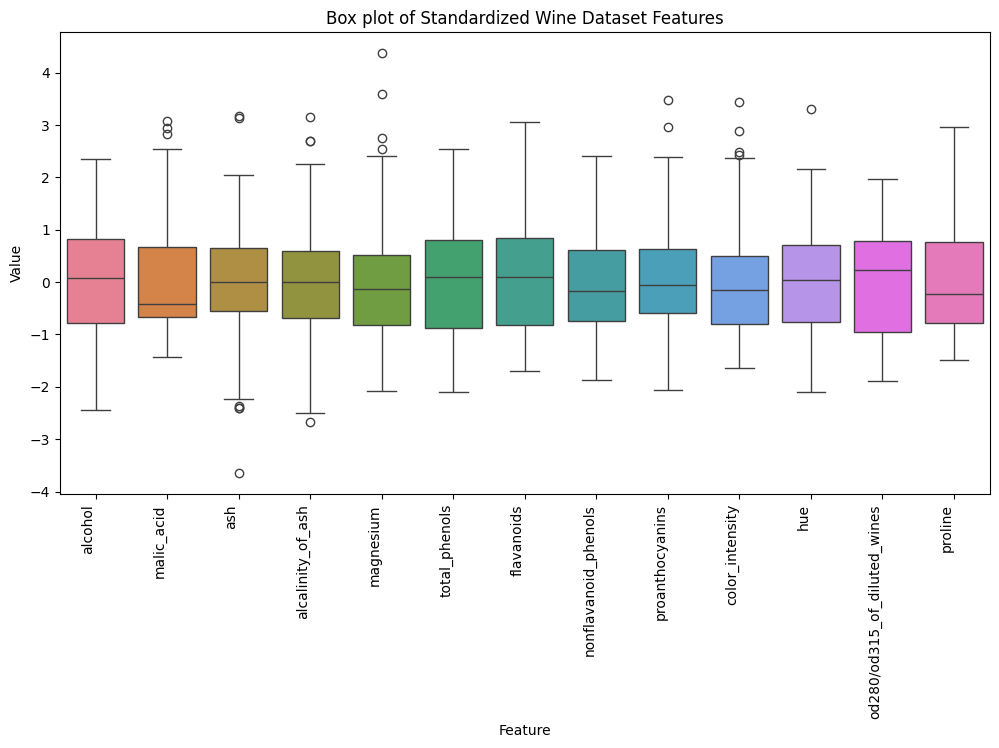

In [ ]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
""" Put the standardized data back into dataframe"""
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
## Your code ends here

# Exploratory Data Analysis
# Visualize key statistics
""" Use boxplot to show visualize the standardized features """
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.boxplot(data=df_standardized)
plt.title("Box plot of Standardized Wine Dataset Features")
plt.xlabel("Feature")
plt.ylabel("Value")
plt.xticks(rotation=90, ha="right")
plt.show()

**Question:** Was the problem resolved?

**You Answer:** The problem is now resolved after standadizing the dataset using StandardScaler.

---



**Coding excersice:** Calculate correlation matrix and visualize it?

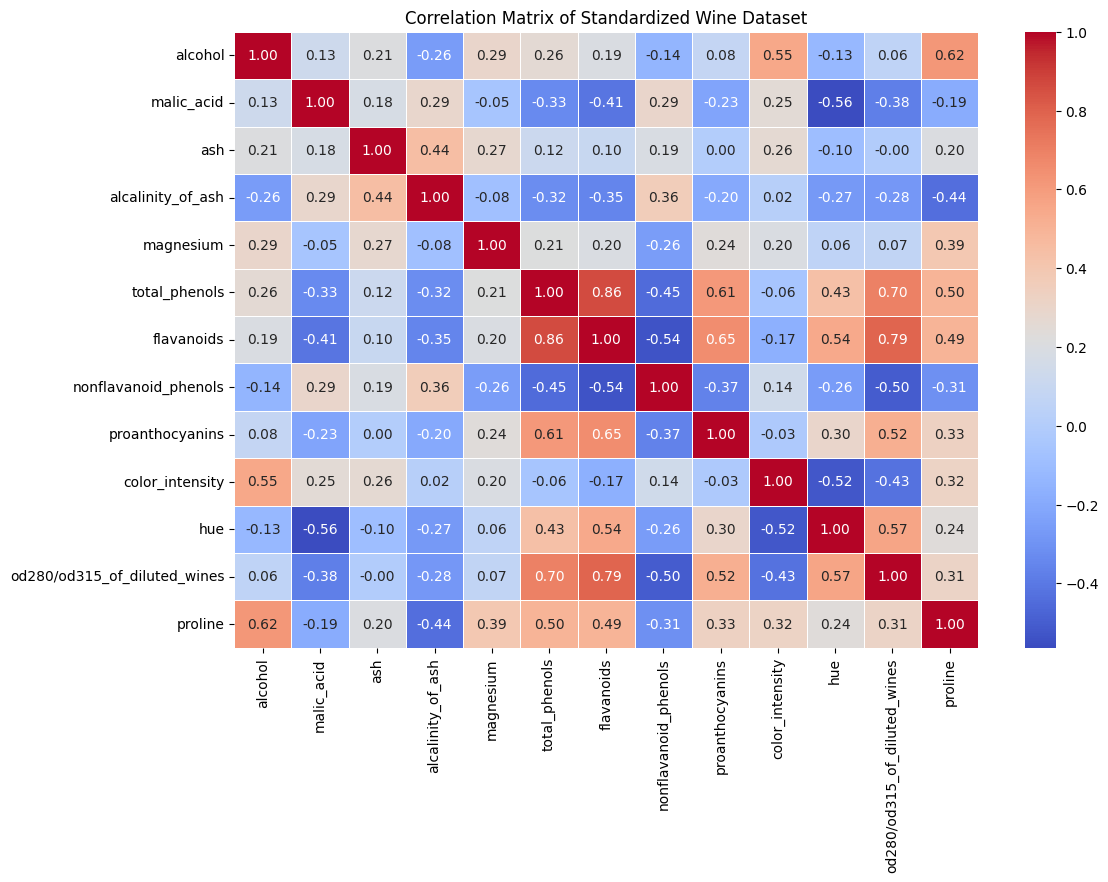

In [ ]:
# Calculate correlation matrix
correlation_matrix = df_standardized.corr()
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt =".2f", linewidths=0.5)
plt.title("Correlation Matrix of Standardized Wine Dataset")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


What is the intuition behind the correlation matrix?

**Your answer:** The correlation matrix helps identify the relationships between variables in the dataset. The values range from -1 to 1 to show how strong the correlations are.
For example, we find that Flavanoids and Total Phenols have a correlation of 0.86, we might drop one of them because they provide similar information to a model.




# Dimensionality Reduction with PCA
Apply Dimensionality Reduction using PCA. Find the number of principle components to retain using the "explained_variance_ratio". Use the threshold of **0.95** for the cumulative explained variance ratio in order to find the number of principle components.

**Note:** When performing dimensionality reduction using PCA, one of the main considerations is to select the appropriate number of principal components to retain. The explained variance ratio tells us the proportion of variance explained by each principal component. By summing up the explained variance ratios cumulatively, we can see how much of the total variance in the data is explained as we include more principal components.

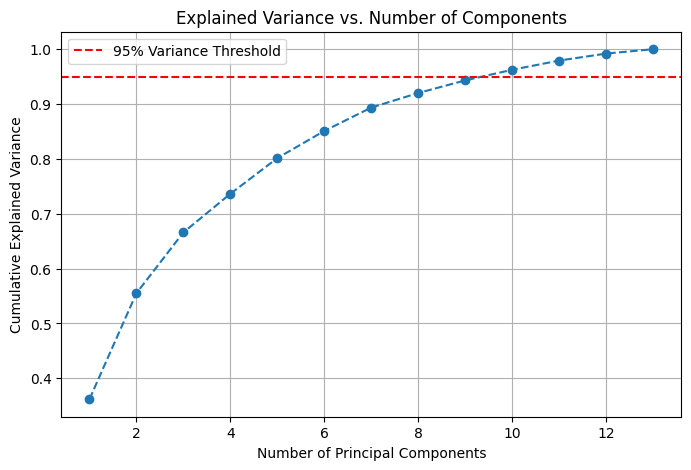

Explained variance ratio of each principal component:
[0.36175413 0.19335431 0.11079959 0.07042714 0.0651282  0.04950682
 0.04260538 0.02659919 0.02297773 0.01935642 0.01680889 0.01274222
 0.00793997]
Summary:
PCA captures 96.25% of the variance with 10 components.


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Dimensionality Reduction using PCA
# Standardize the dataset
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_imputed)

# Apply PCA
pca = PCA()
pca.fit(df_standardized)
## Your code ends here

# Plot explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Choose the number of components based on the explained variance ratio
cumulative_variance = np.cumsum(explained_variance_ratio)

# Perform PCA with the chosen number of components
# Find the number of components required to retain 95% variance
num_components = np.argmax(cumulative_variance >= 0.95) + 1

# Plot explained variance ratio
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.legend()
plt.grid()
plt.show()


# Interpretation and Conclusion
# Interpret principal components
print("Explained variance ratio of each principal component:")
print(pca.explained_variance_ratio_)

# Summarize key findings
print("Summary:")
print(f"PCA captures {cumulative_variance[num_components-1]:.2%} of the variance with {num_components} components.")